In [26]:
% matplotlib inline
import pandas as pd
import numpy as np
import os
import re
import geocoder
import matplotlib.pyplot as plt

In [4]:
# Get to TSP top folder
topdir = "C:\Users\pksohn\Box Sync\Berkeley Coursework\CE259 Public Transportation Systems\TSP Final Project"
os.chdir(topdir)

In [5]:
# List folders in directory

folders = [x[0] for x in os.walk(topdir)]
for i in folders:
    print i.split("\\")[-1]

TSP Final Project
.ipynb_checkpoints
California-Dwell-Q1-2015
California-Dwell-Q2-2015
California-Dwell-Q3-2015
California-Timing_Cards
California-Travel_Times-Q1-2015
California-Travel_Times-Q2-2015
California-Travel_Times-Q3-2015


In [6]:
# create dataframe for aggregated dwell 
dwell = pd.DataFrame(columns = ["quarter","bus","Time","DW"])

In [7]:
# Get dwell folders

dwell_folders = [x for x in folders if "Dwell" in x]
for i in dwell_folders:
    print i.split("\\")[-1]

California-Dwell-Q1-2015
California-Dwell-Q2-2015
California-Dwell-Q3-2015


In [8]:
# Iterate over dwell folders

for folder in dwell_folders:
    foldername = folder.split("\\")[-1]
    print foldername
    
    csv_list = [i for i in os.walk(folder)][0][2]
    for c in csv_list:
        tempdf = pd.read_csv(folder + "\\" + c)
        tempdf["quarter"] = folder.split("\\")[-1]
        tempdf["bus"] = c.split(".")[0]
        dwell = dwell.append(tempdf)
        print "File: " + str(c) + ", Length: " + str(len(tempdf))

print "TOTAL DATAFRAME LENGTH: " + str(len(dwell))

California-Dwell-Q1-2015
File: 3822_01BX_OB.csv, Length: 50
File: 3822_01_OB.csv, Length: 913
File: 3822_1BX_OB.csv, Length: 215
File: 3822_1_OB.csv, Length: 3649
File: 3823_01BX_IB.csv, Length: 108
File: 3823_01_IB.csv, Length: 902
File: 3823_1BX_IB.csv, Length: 473
File: 3823_1_IB.csv, Length: 3609
File: 3824_01BX_OB.csv, Length: 50
File: 3824_01_OB.csv, Length: 914
File: 3824_1BX_OB.csv, Length: 211
File: 3824_1_OB.csv, Length: 3652
File: 3825_01_IB.csv, Length: 904
File: 3825_1_IB.csv, Length: 3605
File: 3827_01AX_IB.csv, Length: 59
File: 3827_01_IB.csv, Length: 903
File: 3827_1AX_IB.csv, Length: 273
File: 3827_1_IB.csv, Length: 3601
File: 3828_01AX_OB.csv, Length: 46
File: 3828_01_OB.csv, Length: 895
File: 3828_1AX_OB.csv, Length: 190
File: 3828_1_OB.csv, Length: 3583
File: 3830_01AX_IB.csv, Length: 59
File: 3830_01_IB.csv, Length: 901
File: 3830_1AX_IB.csv, Length: 273
File: 3830_1_IB.csv, Length: 3596
File: 3831_01AX_OB.csv, Length: 47
File: 3831_01_OB (1).csv, Length: 894
File:

In [9]:
#Save dwelltimes to CSV
dwell.to_csv("dwell.csv")

In [10]:
# create dataframe for aggregated travel times 
tt = pd.DataFrame(columns = ["quarter","bus","Time","TT"])

In [11]:
# Get tt folders

tt_folders = [x for x in folders if "Travel_Times" in x]
for i in dwell_folders:
    print i.split("\\")[-1]

California-Dwell-Q1-2015
California-Dwell-Q2-2015
California-Dwell-Q3-2015


In [12]:
# Iterate over tt folders

for folder in tt_folders:
    foldername = folder.split("\\")[-1]
    print foldername
    
    csv_list = [i for i in os.walk(folder)][0][2]
    for c in csv_list:
        tempdf = pd.read_csv(folder + "\\" + c)
        tempdf["quarter"] = folder.split("\\")[-1]
        tempdf["bus"] = c.split(".")[0]
        tt = tt.append(tempdf)
        print "File: " + str(c) + ", Length: " + str(len(tempdf))

print "TOTAL DATAFRAME LENGTH: " + str(len(tt))

California-Travel_Times-Q1-2015
File: 3822_01BX_OB.csv, Length: 50
File: 3822_1BX_OB.csv, Length: 215
File: 3822_1_OB (1).csv, Length: 3643
File: 3822_1_OB.csv, Length: 3643
File: 3823_01BX_IB.csv, Length: 108
File: 3823_01_IB.csv, Length: 902
File: 3823_1BX_IB.csv, Length: 473
File: 3823_1_IB.csv, Length: 3598
File: 3824_01BX_OB.csv, Length: 50
File: 3824_01_OB.csv, Length: 913
File: 3824_1BX_OB.csv, Length: 211
File: 3824_1_OB.csv, Length: 3645
File: 3825_01_IB.csv, Length: 901
File: 3825_1_IB.csv, Length: 3594
File: 3827_01AX_IB.csv, Length: 59
File: 3827_01_IB.csv, Length: 901
File: 3827_1AX_IB.csv, Length: 273
File: 3827_1_IB.csv, Length: 3594
File: 3828_01AX_OB.csv, Length: 46
File: 3828_01_OB.csv, Length: 895
File: 3828_1AX_OB.csv, Length: 190
File: 3828_1_OB.csv, Length: 3582
File: 3830_01AX_IB.csv, Length: 59
File: 3830_01_IB.csv, Length: 901
File: 3830_1AX_IB.csv, Length: 273
File: 3830_1_IB.csv, Length: 3591
File: 3831_01AX_OB.csv, Length: 46
File: 3831_01_OB.csv, Length: 89

In [13]:
# split stop and bus information 
tt["stop_number"] = tt["bus"].apply(lambda x: x.split("_")[0])
tt["stop_number"] = tt["stop_number"].astype(str)
tt["bus_number"] = tt["bus"].apply(lambda x: x.split("_")[1])
tt["direction"] = tt["bus"].apply(lambda x: x.split("_")[2])

In [14]:
# add stop IDs

cal_stops = pd.read_csv("california_stops.csv")
cal_stops["stop_number"] = cal_stops["stop_number"].astype(str)
cal_stops["stop_number"] = cal_stops["stop_number"].str[1:]
cal_stops.head()

# merge stop ids with location and direction
tt = tt.merge(cal_stops,how="left",on=["stop_number","bus_number","direction"])

In [15]:
# Convert to datetime
tt["Datetime"] = pd.to_datetime(tt.Time)

In [17]:
# geocode stop locations

geocode = pd.DataFrame(tt.stop_location.unique())
geocode = geocode.drop(geocode.index[[0]])
geocode["latitude"] = None
geocode["longitude"] = None
geocode.columns = ["stop_location","latitude","longitude"]
for i in geocode.index:
    latlng = geocode.loc[i,"latitude"] = geocoder.google(geocode.loc[i,"stop_location"] + ", San Francisco, CA").latlng
    geocode.loc[i,"latitude"] = latlng[0]
    geocode.loc[i,"longitude"] = latlng[1]
tt = tt.merge(geocode,how="left",on="stop_location")

In [18]:
# view unique stop names and directions

groupprint = tt.groupby(["bus_number","stop_location","direction","stop_number"]).count()

# export to csv to manually add green extension times and stop locations
# groupprint.to_csv("groupprint.csv")

In [19]:
# import manually added variables on green extension times and stop locations

stop_loc = pd.read_csv("stop_loc.csv")
stop_loc = stop_loc.drop("stop_location",1)
stop_loc.stop_number = stop_loc.stop_number.astype(str)
tt = tt.merge(stop_loc,how="left",on=["bus_number","direction","stop_number"])

In [20]:
# match quarters to TSP phase
TSP_install = {
    "California-Travel_Times-Q1-2015":"Before",
    "California-Travel_Times-Q2-2015":"During",
    "California-Travel_Times-Q3-2015":"After"
}
TSP_phase = pd.DataFrame.from_dict(TSP_install,"index")
TSP_phase.columns = ["TSP_phase"]
tt = tt.merge(TSP_phase,how="left",left_on="quarter",right_index=True)

In [21]:
#Save TT to CSV
tt.to_csv("tt.csv")

In [47]:
# drop rows with Nan for EDA assignment and save to csv

eda = tt.dropna(axis=0)
print len(tt), len(eda)

201914 182617


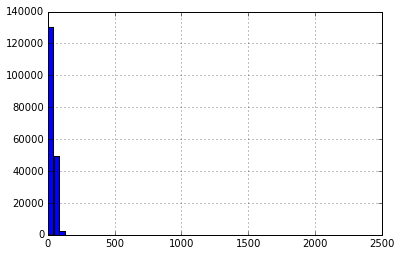

In [48]:
# outlier analysis
# histogram before any cutoffs
eda.TT.hist(bins=50)
plt.show()

In [49]:
eda.TT.describe()

count    182617.000000
mean         40.631497
std          46.946038
min           1.000000
25%          28.000000
50%          34.000000
75%          47.000000
max        2170.000000
Name: TT, dtype: float64

In [50]:
highcut = eda.TT.quantile(q=.99)
lowcut = eda.TT.quantile(q=.01)
print lowcut,highcut

14.0 93.0


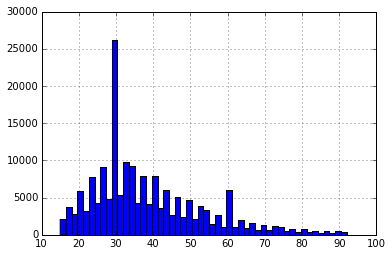

In [51]:
# remove observations 
eda.TT[(eda.TT < highcut) & (eda.TT > lowcut)].hist(bins=50)
plt.show()

In [52]:
print len(eda)
eda = eda[(eda.TT < highcut) & (eda.TT > lowcut)]
print len(eda)

182617
178490


In [53]:
eda.head()

,TT,Time,bus,quarter,stop_number,bus_number,direction,stop_location,Datetime,latitude,longitude,green_ext,stop_place,TSP_phase
3908,70,2015-01-31T04:30:49,3822_1_OB,California-Travel_Times-Q1-2015,3822,1,OB,California St & 4th Ave,2015-01-31 04:30:49,37.7853,-122.462,14,Near,Before
3909,49,2015-01-31T05:41:41,3822_1_OB,California-Travel_Times-Q1-2015,3822,1,OB,California St & 4th Ave,2015-01-31 05:41:41,37.7853,-122.462,14,Near,Before
3910,33,2015-01-31T06:09:39,3822_1_OB,California-Travel_Times-Q1-2015,3822,1,OB,California St & 4th Ave,2015-01-31 06:09:39,37.7853,-122.462,14,Near,Before
3911,40,2015-01-31T10:57:01,3822_1_OB,California-Travel_Times-Q1-2015,3822,1,OB,California St & 4th Ave,2015-01-31 10:57:01,37.7853,-122.462,14,Near,Before
3912,31,2015-01-31T12:07:45,3822_1_OB,California-Travel_Times-Q1-2015,3822,1,OB,California St & 4th Ave,2015-01-31 12:07:45,37.7853,-122.462,14,Near,Before


In [54]:
eda.to_csv("travel_times_eda.csv")